# 서울 특별시 공공자전거 이용정보 데이터 분석
- 사용 데이터: 서울특별시 공공자전거 이용정보(월별)
- 데이터 측정 기간 : 2024년 7월 - 12월

## 1. 데이터 불러오기

In [2]:
import pandas as pd
data = pd.read_csv("data/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding="cp949")
original_data = data.copy()
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6


## 2. 데이터 정보 확인하기

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


### 1) 데이터 형 변환 하기
- 연산이 필요 없는 데이터 변환하기
- 카테고리(범주형 데이터)를 확인하고, 데이터를 일정하게 맞추기

대여소 번호는 연산이 필요 없다.
즉, 통계 계산 데이터를 얻을 필요가 없는 고유값 데이터이다.

`describe` 함수 사용시, 
대여소 번호에 대한 통계 데이터를 object로 취급할 수 있도록 형 변환을 하자

In [4]:
# data["대여소번호"] = data["대여소번호"].apply("object")
data["대여소번호"] = data["대여소번호"].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  object 
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 52.0+ MB


대여일자를 datetime으로 변경하려고 했지만
대여일자를 확인해보니 연-월 정보만 가지고 있다.

```python
# 202407
data["대여일자"] = pd.to_datetime(data["대여일자"], format="%Y%m")
data["대여일자"]
```

하지만, 해당 데이터는 월별 데이터이므로
대여일자도 범주형 데이터라고 할 수 있다

따라서, object 로 변환하자

In [5]:
data["대여일자"] = data["대여일자"].astype("object")

In [6]:
# astype 한 번에 하기
data = data.astype({"대여일자" : object, "대여소번호" : object})

### 2) 카테고리 변수 unique 확인

성별과 연령대 코드를 범주형 데이터로 변경하자

In [59]:
data.isna()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619659,False,False,False,False,False,False,False,False,False,False,False,False,False
619660,False,False,False,False,False,False,False,False,False,False,False,False,False
619661,False,False,False,False,False,False,False,False,False,False,False,False,False
619662,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data["성별"].unique()

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

- 성별에 결측치 데이터가 많다. 이는 응답하지 않은 케이스로 해당 데이터를 Other을 의미하는 "O" 로 만들자
- 성별 데이터에 대무자와 소문자가 섞여있어 하나로 통일시키자 (대문자로 통일하겠다)

In [9]:
data["성별"] = data["성별"].str.upper()
data["성별"] = data["성별"].fillna("O")
data["성별"].unique()

array(['O', 'F', 'M'], dtype=object)

성별에 대한 결측치 데이터가 사라졌음을 확인할 수 있다.

In [10]:
data["성별"] = data["성별"].astype("category")
data["성별"].unique()

['O', 'F', 'M']
Categories (3, object): ['F', 'M', 'O']

In [11]:
data["연령대코드"].unique()
data["연령대코드"] = data["연령대코드"].astype("category")

### 최종적으로 데이터 확인 다시 하기

In [12]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   대여일자     619664 non-null  object  
 1   대여소번호    619664 non-null  object  
 2   대여소명     619664 non-null  object  
 3   대여구분코드   619664 non-null  object  
 4   성별       619664 non-null  category
 5   연령대코드    619664 non-null  category
 6   이용건수     619664 non-null  int64   
 7   운동량      619269 non-null  float64 
 8   탄소량      619269 non-null  float64 
 9   이동거리(M)  619664 non-null  float64 
 10  이용시간(분)  619664 non-null  int64   
dtypes: category(2), float64(3), int64(2), object(4)
memory usage: 43.7+ MB


In [14]:
data.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000


## 3. 결측치 확인하기

In [15]:
nan_result = data.isna().sum(axis=0)
nan_result

대여일자         0
대여소번호        0
대여소명         0
대여구분코드       0
성별           0
연령대코드        0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64

- 성별 데이터의 결측치가 195384건 : 약 30%

In [16]:
nan_result["성별"]

np.int64(0)

### 참고

In [17]:
# 숫자형 데이터만 뽑았을 때, 총 결측치 수
import numpy as np

numeric_df = data.select_dtypes(include=[np.number])
nan_count = np.isnan(numeric_df).sum().sum()
print(f"숫자형에서 NaN 개수: {nan_count}")

숫자형에서 NaN 개수: 790


## 4. 데이터 탐색

In [18]:
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6


### 1) 새로운 열 만들기

<div>
    <img src="https://www.dropbox.com/scl/fi/3s8gvus21mqhcbqkz38zf/.png?rlkey=1kw3p6nleovg9dw6m82ik9izo&dl=1" width="80%">
</div>

In [19]:
# 건당 이동거리(M), 건당 이용시간(분)

data["건당 이동거리(M)"] = data["이동거리(M)"] / data["이용건수"]
data["건당 이용시간(분)"] = data["이용시간(분)"] / data["이용건수"]
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


### 2) 데이터 요약하기

In [20]:
data.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000,619664.000000,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513,2701.308303,24.522191
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371,2035.965154,17.922810
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000,1504.471840,13.866667
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000,2138.456549,20.300000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000,3235.145285,30.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000,74198.100000,863.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   대여일자        619664 non-null  object  
 1   대여소번호       619664 non-null  object  
 2   대여소명        619664 non-null  object  
 3   대여구분코드      619664 non-null  object  
 4   성별          619664 non-null  category
 5   연령대코드       619664 non-null  category
 6   이용건수        619664 non-null  int64   
 7   운동량         619269 non-null  float64 
 8   탄소량         619269 non-null  float64 
 9   이동거리(M)     619664 non-null  float64 
 10  이용시간(분)     619664 non-null  int64   
 11  건당 이동거리(M)  619664 non-null  float64 
 12  건당 이용시간(분)  619664 non-null  float64 
dtypes: category(2), float64(5), int64(2), object(4)
memory usage: 53.2+ MB


In [22]:
# head(6): 2024년 7월에 102번 대여소, 일일권, 성별 없는 건들의 집계 데이터
test_data = data.head(6)
test_data

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000
5,202407,102,102. 망원역 1번출구 앞,일일권,O,기타,23,1922.74,19.53,84195.84,791,3660.688696,34.391304


In [23]:
# 평균 이동거리(M)
# 이동거리의 합 / 이용건 수
test_data["이동거리(M)"].sum() / test_data["이용건수"].sum()

np.float64(2826.3968711656444)

In [24]:
# 건당 이동거리(M)
# 각 행의 이동거리(M) / 이용건수
# 이 의미는 무엇일까?
test_data["건당 이동거리(M)"].mean()

np.float64(3078.334318134193)

### 3) 데이터 시각화

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 이전 코드 복습해보기 
- 목표: 대여일자에 따른 행 카운트 세기
- 판다스: .value_counts()를 통해 대여일자의 빈도표 출력해보기
- 시각화: sns.countplot을 이용하여 대여일자에 대한 막대그래프 그려보기

In [26]:
count_by_month = data["대여일자"].value_counts()
count_by_month

대여일자
202410    108791
202409    107191
202411    103677
202407    103502
202408    103316
202412     93187
Name: count, dtype: int64

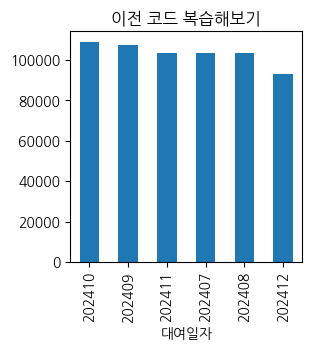

In [27]:
plt.figure(figsize=(3,3))
count_by_month.plot(kind="bar")
plt.title("이전 코드 복습해보기")
plt.show()

- 이 행은

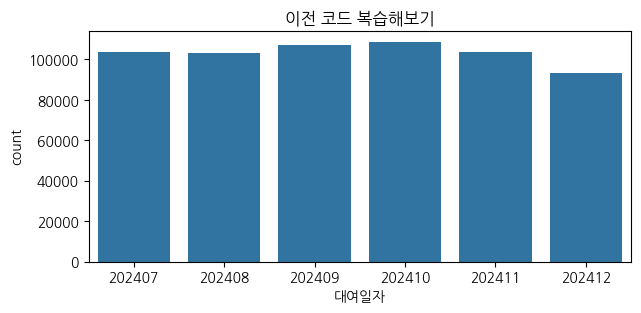

In [28]:
plt.figure(figsize=(7,3))
sns.countplot(data=data, x="대여일자")
plt.title("이전 코드 복습해보기")
plt.show()

#### 이전코드 복습을 다른 방법으로 하기

C:\Users\user\AppData\Local\Temp\ipykernel_27084\2179924966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=count_by_month, palette=cm, legend=False)


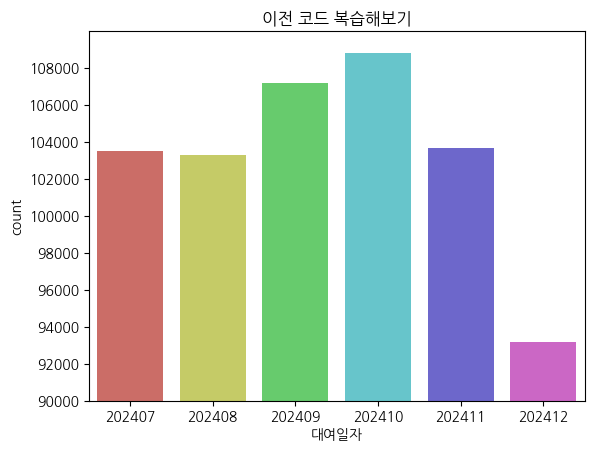

In [29]:
cm = sns.color_palette('hls', len(data['대여일자'].unique()))
ax = sns.barplot(data=count_by_month, palette=cm, legend=False)

ax.set_ylim(90000,110000)
ax.set_yticks(range(90000, 110000, 2000))
plt.title("이전 코드 복습해보기")
plt.show()

In [30]:
month_group = data.groupby("대여일자", observed=False)
num_by_month = month_group["이용건수"].sum()
num_by_month

대여일자
202407    3723233
202408    3998334
202409    4250763
202410    4686753
202411    3499197
202412    2278095
Name: 이용건수, dtype: int64

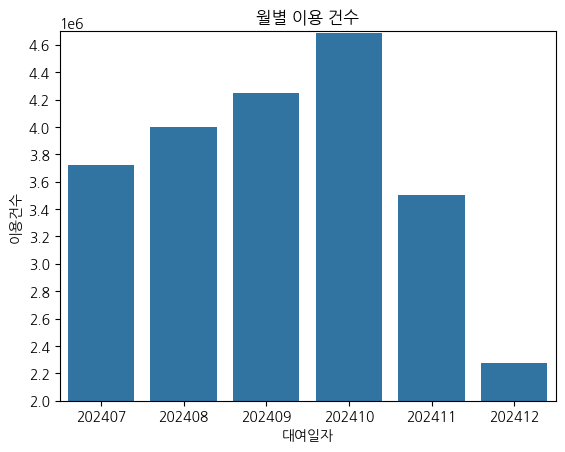

In [31]:
# cm = sns.color_palette('hls', len(data['대여일자'].unique()))
ax = sns.barplot(data=num_by_month)

ax.set_ylim(2000000,4700000)
ax.set_yticks(range(2000000, 4700000, 200000))
ax.set_title("월별 이용 건수")
plt.show()

### 성별이 남자인 사람의 평균 이동거리, 평균 이용시간
- 목표: 데이터 요약 
- 성별이 남자인 데이터 출력하기 data_m
- data_m에서 평균 이동거리, 평균 이용시간 추출한 후 .mean() 사용해보기

#### ⭐ 고민 해볼 것
- 이동거리, 이용시간은 어떻게 집계된 데이터일까?
    - 이동거리 = 대여를 시작한 장소로부터, 대여를 끝낸 장소까지의 위치 데이터를 직선거리로 계산 (실시간 gps로 더 정확한 거리를 계산할 수 도 있을 듯)
    - 이용시간 = 대여를 시작한 시간부터, 대여를 끝낸 시간까지의 데이터 간의 차이로 계산
    - 두 데이터 모두 각 집단의 이동거리의 합산
- 건당 이동거리, 건당 이용시간이 왜 필요할까?
    - 각 집단의 대표값 설정을 위해서?

#### 정확한 계산식

In [32]:
# 평균 이동거리(M)
# 이동거리의 합 / 이동거리 건수
data["이동거리(M)"].sum() / data["이용건수"].sum()

np.float64(2254.0141406537373)

#### 평균의 평균값으로 계산

평균의 평균값으로 계산할 경우 극단값이 존재하면, 
신뢰할 수 있는 값이 나오지 않을 수도 있으므로 주의해야한다.

In [33]:
data_m = data[data["성별"] == "M"]
data_m[["건당 이동거리(M)", "건당 이용시간(분)"]].mean()

건당 이동거리(M)    2668.111610
건당 이용시간(분)      23.170525
dtype: float64

In [34]:
data_m["이용시간(분)"].sum() / data_m["이용건수"].sum()

np.float64(19.664125525743135)

### 성별로 평균 이동거리, 평균 이용시간

In [35]:
data.groupby("성별", observed=False)[["이동거리(M)", "이용시간(분)"]].mean()

,이동거리(M),이용시간(분)
성별,,
F,66747.306317,633.006691
M,105159.953358,929.781992
O,69788.506640,635.282014


In [36]:
data.groupby("성별", observed=False)["이동거리(M)"].agg(func=["min", "mean", "max"])

,min,mean,max
성별,,,
F,0.0,66747.306317,11543940.94
M,0.0,105159.953358,6575883.33
O,0.0,69788.506640,7194367.42


#### 정확한 계산식

In [37]:
data.groupby("성별")["이동거리(M)"].sum()

C:\Users\user\AppData\Local\Temp\ipykernel_27084\477159977.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("성별")["이동거리(M)"].sum()


성별
F    1.334666e+10
M    2.358969e+10
O    1.363556e+10
Name: 이동거리(M), dtype: float64

#### 평균의 평균값으로 계산

In [38]:
data.groupby("성별")["건당 이동거리(M)"].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_27084\1764006553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("성별")["건당 이동거리(M)"].mean()


성별
F    2684.818708
M    2668.111610
O    2756.297323
Name: 건당 이동거리(M), dtype: float64

### 연령대별 이용건수

In [39]:
age_group = data.groupby("연령대코드", observed=False)
sum_age_data = age_group["이용건수"].sum()
sum_age_data

연령대코드
20대      6522094
30대      5787547
40대      3577567
50대      2482276
60대       833880
70대이상     135322
~10대     1515513
기타       1582176
Name: 이용건수, dtype: int64

<Axes: xlabel='연령대코드'>

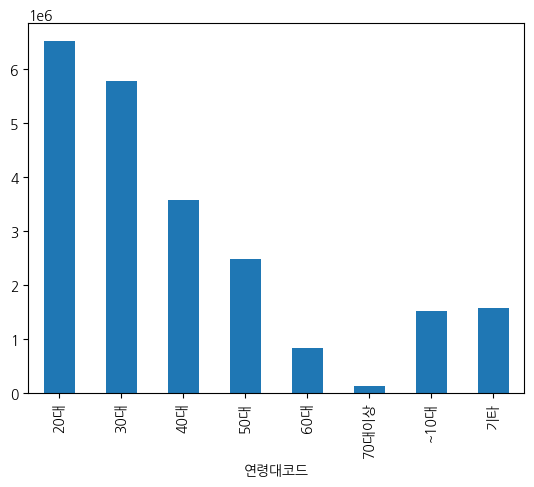

In [40]:
sum_age_data.plot(kind="bar")

In [41]:
data.groupby("연령대코드")["이용건수"].agg(func=["sum"]).sort_index()

C:\Users\user\AppData\Local\Temp\ipykernel_27084\2464080246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("연령대코드")["이용건수"].agg(func=["sum"]).sort_index()


,sum
연령대코드,
20대,6522094
30대,5787547
40대,3577567
50대,2482276
60대,833880
70대이상,135322
~10대,1515513
기타,1582176


C:\Users\user\AppData\Local\Temp\ipykernel_27084\2469855554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sum_age_data, order=["~10대", "20대", "30대", "40대", "50대", "60대", "70대이상", "기타"], palette=cm)
C:\Users\user\AppData\Local\Temp\ipykernel_27084\2469855554.py:2: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=sum_age_data, order=["~10대", "20대", "30대", "40대", "50대", "60대", "70대이상", "기타"], palette=cm)


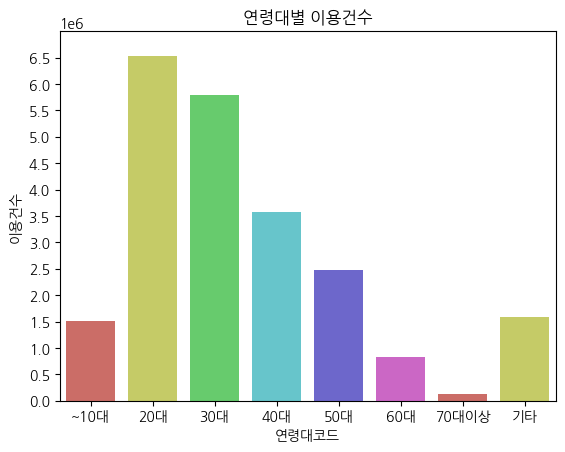

In [42]:
cm = sns.color_palette('hls', len(data['대여일자'].unique()))
ax = sns.barplot(data=sum_age_data, order=["~10대", "20대", "30대", "40대", "50대", "60대", "70대이상", "기타"], palette=cm)

ax.set_ylim(0,7000000)
ax.set_yticks(range(0, 7000000, 500000))
ax.set_title("연령대별 이용건수")
plt.show()

### 대여소별 이용건수

In [43]:
# 대여소 별 이용건수
loc_group = data.groupby("대여소번호", observed=False)
num_by_loc = loc_group["이용건수"].sum()

loc_id = data[["대여소번호", "대여소명"]].drop_duplicates()

pd.merge(num_by_loc, loc_id, on="대여소번호")

,대여소번호,이용건수,대여소명
0,102,21419,102. 망원역 1번출구 앞
1,103,17499,103. 망원역 2번출구 앞
2,104,9754,104. 합정역 1번출구 앞
3,105,5212,105. 합정역 5번출구 앞
4,106,13585,106. 합정역 7번출구 앞
...,...,...,...
2780,6172,2846,6172. 가양5단지아파트
2781,6173,1909,6173. 서울자동차운전전문학원
2782,6176,2795,6176. 유광사 여성병원 앞
2783,6177,7047,6177. 마곡롯데캐슬르웨스트


### 연령대별 이동거리, 이용시간의 평균

In [44]:
data.groupby("연령대코드")[["이동거리(M)", "이용시간(분)"]].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_27084\2664176392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("연령대코드")[["이동거리(M)", "이용시간(분)"]].mean()


,이동거리(M),이용시간(분)
연령대코드,,
20대,142499.011865,1251.660678
30대,130952.576390,1187.715240
40대,94694.477750,870.983396
50대,76180.055360,693.547910
60대,36507.096717,366.507778
70대이상,13337.460096,146.494928
~10대,43806.666793,390.222317
기타,37989.803873,353.929741


In [45]:
# 월별 어느 연령대가 가장 많이 이용했는가
# 각 대여소별 평균 이동 거리를 분석하여 용도 추론
# 대여소별 이용자 연령대
# 대여소별 이용건수
# 연령대별 이용건수가 많은 상위 대여소 리스트
# 대여소별 건당 이용시간 평균
# 수거 용이 시간 분석

# Hint: .groupby(), .pivot_table(), .crosstab()

### 상관관계 분석

In [96]:
import pandas as pd
import numpy as np

data.select_dtypes(include=np.number).corr()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
이용건수,1.000000,0.858427,0.859514,0.859780,0.890181,-0.116449,-0.119843
운동량,0.858427,1.000000,0.994054,0.993940,0.951466,0.060283,0.004818
탄소량,0.859514,0.994054,1.000000,0.999954,0.959721,0.063473,0.009013
이동거리(M),0.859780,0.993940,0.999954,1.000000,0.959927,0.063355,0.008603
이용시간(분),0.890181,0.951466,0.959721,0.959927,1.000000,0.008227,0.030898
건당 이동거리(M),-0.116449,0.060283,0.063473,0.063355,0.008227,1.000000,0.691889
건당 이용시간(분),-0.119843,0.004818,0.009013,0.008603,0.030898,0.691889,1.000000


### 4) 지도 시각화

`uv add folium`

In [46]:
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


In [47]:
# 공공자전거 대여소 정보(api수집).csv
sub_data = pd.read_csv("data/공공자전거 대여소 정보(api수집).csv")
sub_data.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [48]:
# RENT_NO, RENT_ID_NM, STA_LAT, STA_LONG 열만 가지고 오기
sub_data = sub_data[["RENT_NO", "RENT_ID_NM", "STA_LAT", "STA_LONG"]]
sub_data.head()

,RENT_NO,RENT_ID_NM,STA_LAT,STA_LONG
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300


In [49]:
sub_data.rename(columns={
    "RENT_NO" : "대여소번호",
    "RENT_ID_NM" : "대여소명",
    "STA_LAT" : "위도", 
    "STA_LONG" : "경도"
}, inplace=True)
sub_data.head()

,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300


In [50]:
# new_data에서 대여소별로 이동거리(M), 이용시간(분), 이용건수의 합 구하기

summary_data = data.groupby("대여소명")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()
summary_data

,이동거리(M),이용시간(분),이용건수
대여소명,,,
1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1002. 해공공원(천호동),37190390.67,349509,15322
1003. 해공도서관앞,14033033.55,155349,7385
1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
1006. 롯데캐슬 115동앞,2869819.58,26311,1540
...,...,...,...
992.북한산입구 정류장,3876214.34,28775,993
993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097
994.북한산생태공원입구(교통섬),2842205.41,24495,1639


In [64]:
result = pd.pivot_table(data,                # 피벗할 데이터프레임
                index = '대여소명',    # 행 위치에 들어갈 열
                # columns = ["이동거리(M)", "이용시간(분)", "이용건수"],    # 열 위치에 들어갈 열
                values = ["이동거리(M)", "이용시간(분)", "이용건수"],     # 데이터로 사용할 열
                aggfunc = ['mean', 'sum'])   # 데이터 집계함수
result.head()

mean                                  sum  \
                                 이동거리(M)       이용건수      이용시간(분)      이동거리(M)   
대여소명                                                                            
1001. 광진교 남단 사거리(천호공원 방면)   92921.609588  40.172840   872.502058  22579951.13   
1002. 해공공원(천호동)            146418.860906  60.322835  1376.019685  37190390.67   
1003. 해공도서관앞                59211.112025  31.160338   655.481013  14033033.55   
1004. 삼성광나루아파트 버스정류장       124959.091673  40.731518  1205.354086  32114486.56   
1006. 롯데캐슬 115동앞            15104.313579   8.105263   138.478947   2869819.58   

                                          
                            이용건수 이용시간(분)  
대여소명                                      
1001. 광진교 남단 사거리(천호공원 방면)   9762  212018  
1002. 해공공원(천호동)            15322  349509  
1003. 해공도서관앞                7385  155349  
1004. 삼성광나루아파트 버스정류장       10468  309776  
1006. 롯데캐슬 115동앞            1540   26311

In [73]:
result = pd.pivot_table(
                data = data,                # 피벗할 데이터프레임
                index = '대여소명',    # 행 위치에 들어갈 열
                columns = "성별",    # 열 위치에 들어갈 열
                values = "이용건수",     # 데이터로 사용할 열
                aggfunc = ['sum'],
                observed=False)   # 데이터 집계함수
result.head()

sum            
성별                            F     M     O
대여소명                                       
1001. 광진교 남단 사거리(천호공원 방면)  2693  3804  3265
1002. 해공공원(천호동)            3961  6931  4430
1003. 해공도서관앞               2044  3076  2265
1004. 삼성광나루아파트 버스정류장       2657  4278  3533
1006. 롯데캐슬 115동앞            348   694   498

In [90]:
import pandas as pd

result = pd.crosstab(
    index = data["대여소명"], 
    columns = data["연령대코드"], 
    values=None, 
    aggfunc=None, 
    margins=True, 
    margins_name='Total', 
    dropna=True, 
    normalize=False)

result.head()

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타,Total
대여소명,,,,,,,,,
1001. 광진교 남단 사거리(천호공원 방면),36,36,36,33,27,8,25,42,243
1002. 해공공원(천호동),36,36,35,36,24,13,32,42,254
1003. 해공도서관앞,36,36,34,32,24,10,26,39,237
1004. 삼성광나루아파트 버스정류장,36,36,36,34,27,11,36,41,257
1006. 롯데캐슬 115동앞,35,30,30,24,19,3,24,25,190


In [94]:
import pandas as pd

result = pd.crosstab(
    index = data["대여소명"], 
    columns = data["연령대코드"], 
    values= data["이용건수"], 
    aggfunc='mean', 
    margins=True, 
    margins_name='Total', 
    dropna=True, 
    normalize=False)

result.head()

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타,Total
대여소명,,,,,,,,,
1001. 광진교 남단 사거리(천호공원 방면),90.750000,74.194444,37.888889,34.666667,14.185185,1.750000,17.480000,11.476190,40.172840
1002. 해공공원(천호동),134.055556,126.916667,64.914286,45.638889,22.958333,3.384615,19.875000,18.595238,60.322835
1003. 해공도서관앞,73.138889,56.472222,30.617647,25.718750,8.333333,6.900000,8.423077,9.410256,31.160338
1004. 삼성광나루아파트 버스정류장,82.527778,60.722222,46.888889,46.882353,19.629630,2.090909,15.555556,22.341463,40.731518
1006. 롯데캐슬 115동앞,13.057143,10.633333,8.833333,4.625000,2.157895,1.333333,10.083333,4.040000,8.105263


In [51]:
# summary_data에서 인덱스 리셋하기
summary_data = summary_data.reset_index()
summary_data.head()

,대여소명,이동거리(M),이용시간(분),이용건수
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1,1002. 해공공원(천호동),37190390.67,349509,15322
2,1003. 해공도서관앞,14033033.55,155349,7385
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540


In [52]:
# 반복문 이해하기
lat_list = []  # 위도
long_list = [] # 경도

for name in summary_data["대여소명"].tolist():
    try:
        lat_value = sub_data.loc[sub_data["대여소명"]==name, "위도"].item() # .values[0], .iloc[0]
        long_value = sub_data.loc[sub_data["대여소명"]==name, "경도"].item()
    except:
        lat_value = None
        long_value = None
    
    lat_list.append(lat_value)
    long_list.append(long_value)

summary_data["위도"] = lat_list
summary_data["경도"] = long_list

summary_data    

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762,37.541794,127.124748
1,1002. 해공공원(천호동),37190390.67,349509,15322,37.545265,127.125938
2,1003. 해공도서관앞,14033033.55,155349,7385,37.543957,127.125488
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468,37.553329,127.128868
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540,37.554867,127.142799
...,...,...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993,37.658287,126.945297
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097,37.630287,126.919563
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639,37.610508,126.938538
2783,995.은평다목적체육관,4923604.57,44168,2544,37.631409,126.925407


In [53]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기 data_d_top10
data_d_top10 = summary_data.sort_values(by="이동거리(M)", ascending=False).head(10)
data_d_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1409,3511. 응봉역 1번출구,1.208717e+08,832153,21577,37.551250,127.035103


In [54]:
# summary_data에서 이용시간이 많은 순으로 Top10 뽑기 data_t_top10
summary_data.sort_values(by="이용시간(분)", ascending=False).head(10)

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217


In [55]:
# summary_data에서 이용건수가 많은 순으로 Top10 뽑기 data_c_top10
summary_data.sort_values(by="이용건수", ascending=False).head(10)

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
1200,2728.마곡나루역 3번 출구,9.318509e+07,752838,65977,37.565804,126.828079
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1175,2701. 마곡나루역 5번출구 뒤편,6.483893e+07,529924,59768,37.565201,126.827316
124,"1153. 발산역 1번, 9번 인근 대여소",8.286086e+07,750695,55671,37.558949,126.837173
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217
1428,3533. 건대입구역 사거리(롯데백화점),8.230525e+07,864711,40457,37.539295,127.070786
101,1124. 발산역 6번 출구 뒤,5.854875e+07,599263,40233,37.558178,126.838455


#### 지도 시각화

In [56]:
import folium

# 지도 출력하기
center = [37.565516, 126.978025] # 중심 위치
map = folium.Map(location=center, zoom_start=12)
map

#### 이동거리 Top10 표시하기

In [57]:
for i in range(len(data_d_top10)):
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=temp.name).add_to(map)
map

#### 이용시간 Top10 표시하기

#### 이용건수 Top10 표시하기

#### 머지 데이터로

In [58]:
new_data = pd.merge(
    left=data,
    right=sub_data,
    on="대여소번호"
)

new_data

,대여일자,대여소번호,대여소명_x,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분),대여소명_y,위도,경도
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582,102. 망원역 1번출구 앞,37.555649,126.910629
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250,102. 망원역 1번출구 앞,37.555649,126.910629
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000,102. 망원역 1번출구 앞,37.555649,126.910629
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333,102. 망원역 1번출구 앞,37.555649,126.910629
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000,102. 망원역 1번출구 앞,37.555649,126.910629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050,1814.608909,19.090909,6178. 마스터밸류에이스 지식산업센터,37.558750,126.859917
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183,1107.352000,18.300000,6178. 마스터밸류에이스 지식산업센터,37.558750,126.859917
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3,558.260000,3.000000,6178. 마스터밸류에이스 지식산업센터,37.558750,126.859917
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80,1450.155714,11.428571,6178. 마스터밸류에이스 지식산업센터,37.558750,126.859917
